In [1]:
def readSequence(filename):
  sequence = ''
  with open(filename, 'r') as f:
    for line in f:
      if not line[0] == '>':
        sequence += line.rstrip()
  return sequence

In [4]:
raw_dna_seq = readSequence('/home/manju838/coding/Datasets/sequence.fasta')
print("Length of sequence: " + str(len(raw_dna_seq)))
print(raw_dna_seq[:10])

Length of sequence: 161108492
CACTCACACT


In [6]:
counts = {'C':0 , 'N':0 , 'W':0 , 'G':0 , 'Y':0 , 'T':0 , 'R':0 , 'A':0 , 'S':0 , 'M':0 , 'K':0 }
for base in raw_dna_seq:
  counts[base] +=1
print(counts)

{'C': 29885429, 'N': 11541362, 'W': 28527, 'G': 29834369, 'Y': 147468, 'T': 44579192, 'R': 145130, 'A': 44842710, 'S': 32003, 'M': 36297, 'K': 36005}


In [7]:
counts['A'] + counts['T'] + counts['C'] + counts['G']

149141700

In [8]:
import re
pattern = r'[NWYRSMK]'
# Remove characters 'N' , 'W' , 'Y' , 'R' , 'S' , 'M' and 'K' from raw_dna_seq
processed_dna_seq = re.sub(pattern, '', raw_dna_seq)


In [9]:
len(processed_dna_seq)

149141700

In [10]:
transcript = processed_dna_seq.maketrans("ATCG","UAGC")
rna_sequence = processed_dna_seq.translate(transcript)

In [11]:
rna_len = len(rna_sequence)
print(rna_len)

149141700


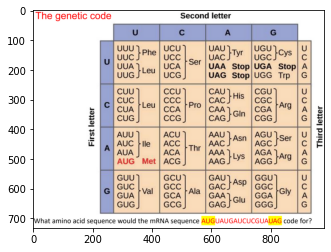

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/manju838/coding/ELS/RNA Codon Table.PNG')
imgplot = plt.imshow(img)
plt.show()

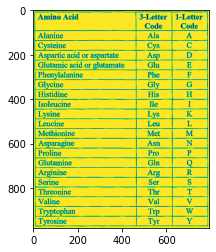

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/manju838/coding/ELS/Amino Acid Codes.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
RNA_Codons = {
    # Start-'M', Stop-'*'
    'UUU':'F','UUC':'F','UUA':'L','UUG':'L',
    'UCU':'S','UCC':'S','UCA':'S','UCG':'S',
    'UAU':'Y','UAC':'Y','UAA':'*','UAG':'*',
    'UGU':'C','UGC':'C','UGA':'*','UGG':'W',

    'CUU':'L','CUC':'L','CUA':'L','CUG':'L',
    'CCU':'P','CCC':'P','CCA':'P','CCG':'P',
    'CAU':'H','CAC':'H','CAA':'Q','CAG':'Q',
    'CGU':'R','CGC':'R','CGA':'R','CGG':'R',

    'AUU':'I','AUC':'I','AUA':'I','AUG':'M',
    'ACU':'T','ACC':'T','ACA':'T','ACG':'T',
    'AAU':'N','AAC':'N','AAA':'K','AAG':'K',
    'AGU':'S','AGC':'S','AGA':'R','AGG':'R',

    'GUU':'V','GUC':'V','GUA':'V','GUG':'V',
    'GCU':'A','GCC':'A','GCA':'A','GCG':'A',
    'GAU':'D','GAC':'D','GAA':'E','GAG':'E',
    'GGU':'G','GGC':'G','GGA':'G','GGG':'G',    

}

In [15]:
protein = ""
for i in range(0, rna_len, 3):
    codon = rna_sequence[i:i+3]
    protein += RNA_Codons[codon]
#print(f"\nThe protein sequence is: \n\n{protein}")

In [16]:
len(protein)

49713900

In [19]:
len(protein) * 3 == rna_len

True

In [20]:
protein[:80]

'VSVNTYLVDLSFNCSFFFFFFCT*IFRVISFRVILLHTVIFRNLNSFFFFFSRLFNFFFFSFFISLF*FLNINKIIITQ*'

In [25]:
list_of_proteins = protein.split("*")


In [26]:
len(list_of_proteins)

2847335

In [27]:
list_of_proteins[:10]

['VSVNTYLVDLSFNCSFFFFFFCT',
 'IFRVISFRVILLHTVIFRNLNSFFFFFSRLFNFFFFSFFISLF',
 'FLNINKIIITQ',
 'VFMGFQLETNLDLVKNNSNTAIQNREKKLICTIKESSVKVIHPLDHYKHIIKT',
 'AD',
 'MT',
 'INVIKKNGLKFYYFLTCIRVIGPTRVSLLRLKFSVGVSEYMTY',
 'GECVA',
 'TLLFFISTSFRISKGSQVPPTPSDH',
 'NRYFSIETLHL']

In [29]:
protein_length_min = 44
len_dict = {"44-100":0, "100-500":0, "greater than 500":0}
for i in list_of_proteins:
  if(len(i) < protein_length_min): list_of_proteins.remove(i)
  elif(len(i) >=44 and len(i) < 100): len_dict['44-100'] +=1
  elif(len(i) >=100 and len(i) < 500): len_dict['100-500'] +=1
  elif(len(i) > 500): len_dict['greater than 500'] +=1


KeyboardInterrupt: 

In [30]:
print(len_dict)

{'44-100': 51227, '100-500': 2861, 'greater than 500': 0}


In [89]:
protein_length_min = 44
len_dict = {"lesser than 44":0, "44-100":0, "100-500":0, "greater than 500":0}

In [90]:
list_of_proteins.sort(key=len)

In [47]:
type(list_of_proteins)

list

In [87]:
def binary_search(item_list, item):
    found = False
    first = 0
    last = len(item_list) -1
    index = 0
   
    while(first <= last):
        mid = (first + last)//2
        if(item_list[mid] == item):
            found = True
            print(mid)
            index = mid
        else:
            if(item < len(item_list[mid])):
                last = mid-1
            else:
                first = mid + 1
    if(not found):
        print("Search near: " + str(mid))
    return(index)

In [88]:
binary_search(list_of_proteins, 44)

Search near: 1927425


0

In [93]:
print(len(list_of_proteins[1900000]))
print(len(list_of_proteins[1910000]))

print(len(list_of_proteins[1920000]))
print(len(list_of_proteins[1910010]))

print(len(list_of_proteins[1910100]))
print(len(list_of_proteins[1911000]))

print(len(list_of_proteins[1915010]))
print(len(list_of_proteins[1917100]))

print(len(list_of_proteins[1913000]))
print(len(list_of_proteins[1914500]))
print(len(list_of_proteins[1914900]))


# print(len(list_of_proteins[1919110]))
# print(len(list_of_proteins[1911100]))

42
43
44
43
43
43
43
44
43
43
43


In [116]:
def binary_range_search(protein_list, element_len):
    first = 0
    last = len(protein_list) - 1
    while(first <= last):
        mid = (first + last)//2
        if(len(protein_list[mid]) > element_len):
            last = mid - 1
            print("greater than " + str(mid) + " current_length is: " + str(len(protein_list[mid])))
        elif(len(protein_list[mid]) < element_len):
            first = mid + 1
            print("less than " + str(mid) + " current_length is: " + str(len(protein_list[mid])))
        else:
            print(mid,len(protein_list[mid]))
            mid = mid + 50000
            

In [112]:
print(len(list_of_proteins[1916306]))
print(len(list_of_proteins[1916307]))
print(len(list_of_proteins[1916308]))

44
44
44


In [115]:
binary_range_search(list_of_proteins, 43)

less than 1066466 current_length is: 11
less than 1599700 current_length is: 24
less than 1866317 current_length is: 39
greater than 1999625 current_length is: 53
greater than 1932971 current_length is: 45
less than 1899644 current_length is: 42
greater than 1916307 current_length is: 44
1907975 43
